<a href="https://colab.research.google.com/github/udaysinghkanwar/Automobile-Detection-CNN/blob/main/Automobile_Detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# McMaster Drone Club - Tensorflow Workshop - CNN for Object Detection

Resources
- General Overview and Visualization: https://www.youtube.com/watch?v=pj9-rr1wDhM&ab_channel=Futurology%E2%80%94AnOptimisticFuture
- More Specific: https://www.youtube.com/watch?v=YRhxdVk_sIs&ab_channel=deeplizard





In [3]:
#install tensorflow

import tensorflow as tf

In [2]:
#additional imports

import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model


# Data Processing

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000,)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


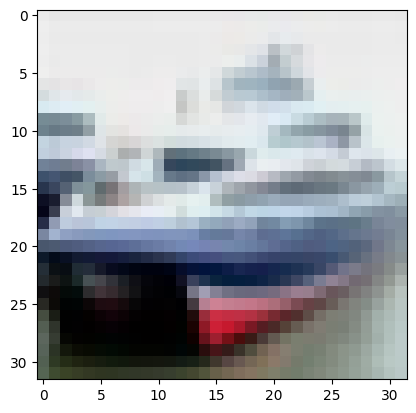

In [8]:
# CIFAR-10 has 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# CIFAR-10 loads labels with shape (N,1), so let's flatten them to (N,) for consistency
y_train = y_train.flatten()
y_test = y_test.flatten()

print("Train images shape:", x_train.shape)  # (50000, 32, 32, 3)
print("Train labels shape:", y_train.shape)  # (50000,)
print("Test images shape:", x_test.shape)    # (10000, 32, 32, 3)
print("Test labels shape:", y_test.shape)    # (10000,)

# Class names for reference
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

plt.imshow(x_test[1].squeeze(), cmap='gray')

In [5]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# Number of classes
K = len(set(y_train))  # should be 10 for CIFAR-10
print("Number of classes:", K)



Number of classes: 10


# Create The Model

In [6]:
# Define input shape: (32, 32, 3) for color images
i = Input(shape=(32, 32, 3))

# Convolutional layers (simple example)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

# Flatten + Dense layers
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 15, 15, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 390,986 (1.49 MB)

 Trainable params: 390,986 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

# Train The Model

In [7]:
# Train for a few epochs (increase if you want better accuracy, but it’ll take longer)
r = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5
)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.3443 - loss: 1.7656 - val_accuracy: 0.5354 - val_loss: 1.2737
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.5510 - loss: 1.2462 - val_accuracy: 0.6015 - val_loss: 1.1124
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.6102 - loss: 1.0868 - val_accuracy: 0.6409 - val_loss: 1.0198
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6517 - loss: 0.9744 - val_accuracy: 0.6674 - val_loss: 0.9504
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6834 - loss: 0.8923 - val_accuracy: 0.6721 - val_loss: 0.9289


# Review the Model's Performance

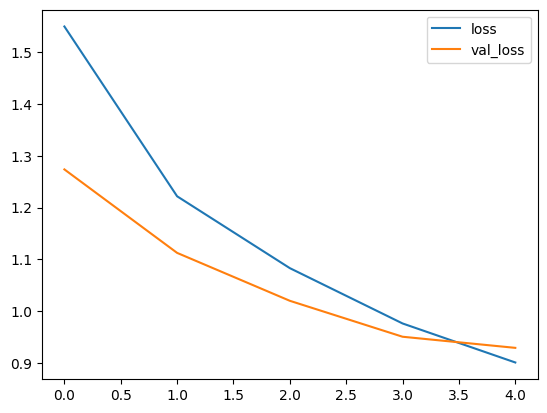

In [9]:
# Plot loss per iteration

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss') # going up at end, so its more and more confident about its wrong answers
plt.legend()

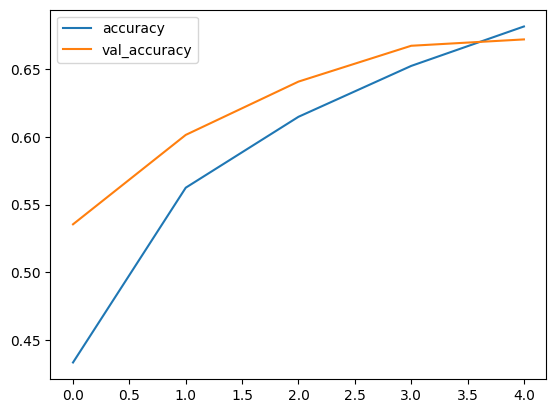

In [10]:
# Plot accuracy per iteration


plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

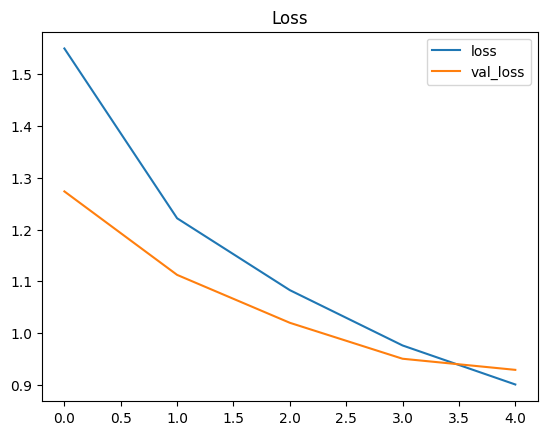

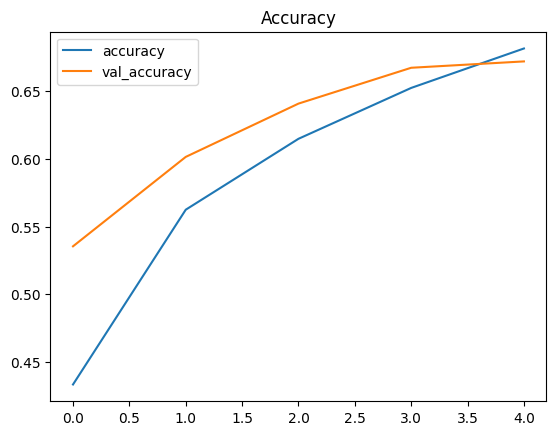

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4442 - loss: 134.7793
Test Accuracy: 0.4437


In [11]:
# Plot loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.title("Loss")
plt.show()

# Plot accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title("Accuracy")
plt.show()

# Final evaluation on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


In [12]:
# --- SAVE MODEL ---
import json
import pickle

# 1) Serialize model architecture as JSON
model_json = model.to_json()

# 2) Get weights
model_weights = model.get_weights()

# 3) Combine architecture + weights into one object
model_package = (model_json, model_weights)

# 4) Pickle the combined object
with open("cifar10_model.pkl", "wb") as f:
    pickle.dump(model_package, f)

print("Model has been saved (pickled) as cifar10_model.pkl.")


Model has been saved (pickled) as cifar10_model.pkl.


In [13]:
# --- LOAD MODEL ---
with open("cifar10_model.pkl", "rb") as f:
    loaded_model_json, loaded_model_weights = pickle.load(f)

# Reconstruct the model from JSON
loaded_model = tf.keras.models.model_from_json(loaded_model_json)

# Set the weights
loaded_model.set_weights(loaded_model_weights)

# Compile again (same settings as before)
loaded_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Model has been reloaded from cifar10_model.pkl.")


Model has been reloaded from cifar10_model.pkl.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
True label: truck
Predicted:  truck


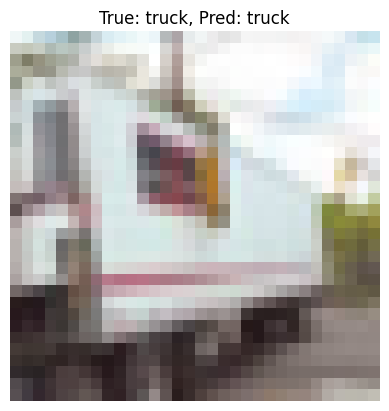

In [15]:
# Verify the reloaded model works by predicting on a random test image
idx = random.randint(0, len(x_test) - 1)
test_image = x_test[idx]
true_label = y_test[idx]

# Add batch dimension for prediction
pred_probs = loaded_model.predict(test_image[np.newaxis, ...])
pred_label = np.argmax(pred_probs)

print(f"True label: {class_names[true_label]}")
print(f"Predicted:  {class_names[pred_label]}")

# Show the image
plt.imshow(test_image)
plt.title(f"True: {class_names[true_label]}, Pred: {class_names[pred_label]}")
plt.axis('off')
plt.show()
